<a href="https://colab.research.google.com/github/geeorgebixleer/NPL_Corrector_ortografico/blob/main/NPL__Corrector_ortografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Corrector ortográfico: Aplicación de técnicas de PLN**

##**INTRODUCCIÓN:**

La comunicación entre humano-máquina y máquina-humano no es tan sencilla de ser realizada, dado que las máquinas entienden en código (bits) y los humanos usamos diferentes idiomas y lenguajes.

El procesamiento de lenguaje natural (PLN o NLP) es una ciencia que mezcla lingüística, computación e inteligencia artificial para simular un traductor entre un humano y una máquina a través de la lingüística.

En nuestro día a día, las máquinas son una parte importante para poder comunicarnos, por lo que es primodial establecer un lenguaje y/o idioma humano-máquina (y viceversa) cuanto más próximo a nuestro lenguaje natural, lo que hará más fácil nuestra comunicación con las máquinas para obtener resultados mejores.

Actualmente, existen innúmeras aplicaciones basadas en técnica PLN, como son "análisis de sentimiento", "asistentes virtuales", "traductores", "sistemas de búsqueda" y "correctores ortográficos".




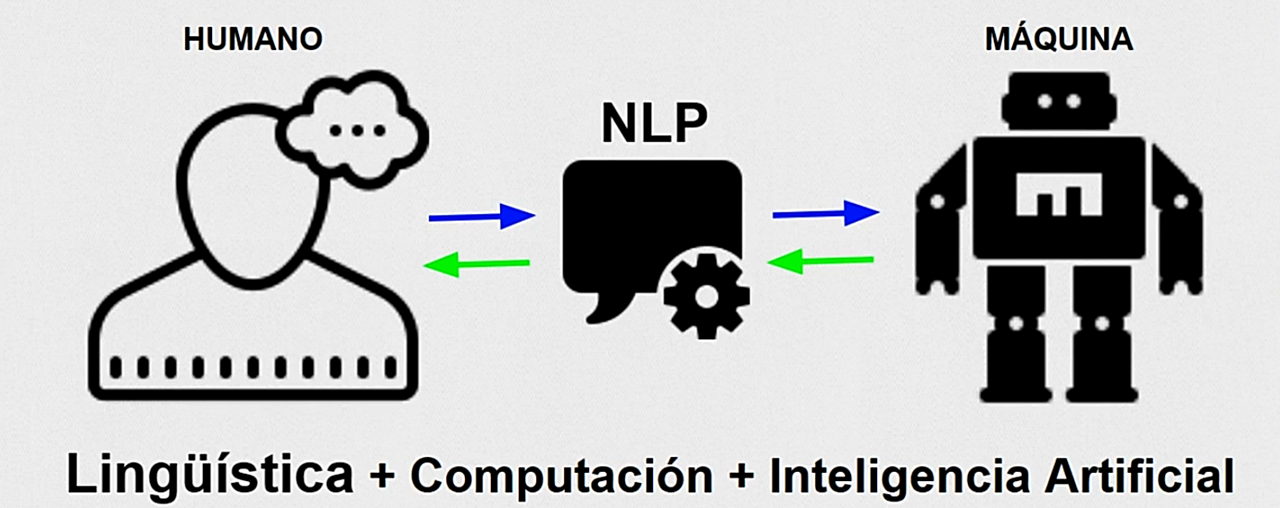

##**RESUMEN:**

Se construyó un modelo de corrector ortográfico basado en el Procesamiento de Lenguaje Natural (NPL), tomando como corpus un archivo ficticio que inicialmente contenía 288,071 palabras.

Posteriormente, se realizó la normalización y eliminación de duplicados, obteniendo  5101 palabras residuo para construir las funciones necesarias para ejecutar el corrector ortográfico. Dicho corrector ortográfico es capaz de realizar distintas operaciones para modificar las letras y el orden de las mismas dentro de una palabra, así como de seleccionar la que presenta mayor frecuencia de aparición en el corpus.

Para fines de calidad, se añadió una función que calcula la tasa de la asertividad, misma que permitió medir la eficiencia del modelo, considerando como referencia un listado de palabras de prueba.

##1.Configurando el ambiente:

In [253]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

In [214]:
nltk.download('punkt') #instalacion modulo punkt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##2.Importando el corpus

Con el método '*open*' y pasando la propiedad '*r*' como parámetro, abrimos el archivo en modo lectura. Luego con el método '*.read()*' hacemos lectura del archivo.

In [215]:
with open('textos_articulo.txt', 'r') as f:
  articulos = f.read() #var que almacena los articulos
print(articulos[:500]) #primeros 500 caracteres


"HTTP: Diferencias entre GET y POST "
2020-10-21
"Vea las diferencias entre los métodos GET y POST de HTTP. Consulta la funcionalidad de cada uno y cuándo usarlos en la web."
"yuri-oliveira"
"yuri.oliveira@alura.com.br"
"front-end"

Cuando vamos a acceder a un sistema web, es bastante común pasar por una pantalla de inicio de sesión, en la que ponemos nuestras credenciales para acceder al sistema.
Estas informaciones deben ser confidenciales, sin embargo, cuando intenté iniciar sesión en una ap


In [216]:
len(articulos) #total de caracteres dentro de 'articulos'

288071

##3.Tokenizacion con NLTK

Tokenización es el proceso de separación, de reducir en unidades menores nuestro texto para poder analizarlo.

- **Módulo tok tok:**

Tok-tok is a fast, simple, multilingual tokenizer. Python and Perl implementations are provided.

https://github.com/jonsafari/tok-tok

In [217]:
toktok = ToktokTokenizer() #instanciando tokenizer 'toktok'

###3.1.Excluyendo caracteres no alfabéticos

- **Función "separa_palabras"**:

Integra el método '*is.alpha*()' para filtrar cualquier carácter no alfabético, adicionando las palabras resultantes a una lista.

In [218]:
def separa_palabras(lista_tokens): #recibe lista de tokens
  lista_palabras = []
  for token in lista_tokens:
    if token.isalpha(): #evalua si el parametro es alfabético
      lista_palabras.append(token) #si lo es, se adiciona a la lista
  return lista_palabras

In [219]:
palabras_separadas = toktok.tokenize(articulos) #tokenizando palabras en 'articulos'
lista_palabras = separa_palabras(palabras_separadas) #llamado a función y almacena en variable

In [220]:
print(f'La cantidad de palabras en el corpus es de: {len(lista_palabras)}')

La cantidad de palabras en el corpus es de: 40052


In [221]:
lista_palabras[:10] #primeras 10 palabras

['HTTP',
 'Diferencias',
 'entre',
 'GET',
 'y',
 'POST',
 'Vea',
 'las',
 'diferencias',
 'entre']

- El número de palabras se ha reducido de 288,071 a 40,052.
- Al imprimir la lista de palabras se observa que algunas se repiten repeten.

##4.Normalización y eliminación de duplicados

- **Función "normalizar":**

Integra el método *'.lower'* para convertir todos los caracteres de un string a minúscula.

In [222]:
def normalizar(lista_palabras):
  lista_normalizada = [] #lista vacía
  for palabra in lista_palabras:
    lista_normalizada.append(palabra.lower()) #almacena palabras normalizadas
  return lista_normalizada #devuelve lista normalizada

In [223]:
palabras_normalizadas = normalizar(lista_palabras) #variable que almacena el resultado de la función
print(palabras_normalizadas[:20]) #primeras 20 palabras

['http', 'diferencias', 'entre', 'get', 'y', 'post', 'vea', 'las', 'diferencias', 'entre', 'los', 'métodos', 'get', 'y', 'post', 'de', 'consulta', 'la', 'funcionalidad', 'de']


- **Método *set()*:**

Sirve para eliminar duplicados.

In [224]:
palabras_unicas = set(palabras_normalizadas) #eliminando palabras repetidas
print(len(palabras_unicas)) #impresión de palabras sin duplicado

5101


- La lista de palabras contiene solo minúsculas y se han eliminado los duplicados.
- El número de palabras se ha reducido de 40,052 a 5101.


##5.Operaciones del corrector - v1

En esta primera etapa, nuestro corrector va a colocar la letra faltante mediante **operación de adición**.


###5.1.Adición




**Función "*adicionar_palabras*" :**

- Iteración que recorre cada palabra de "*partes*" y genera una nueva palabra concatenando la "parte" izquierda,  más una letra, más la "parte" derecha.
- Las nuevas palabras se almacenan en "*nuevas_palabras*".


In [225]:
def adicionar_letras(partes): #función para adicionar letras
  letras = 'abcdefghijklmnñopqrstuvwxyzáéíóú'
  nuevas_palabras = []
  for I, D in partes:  #itera cada parte de 'partes' (izq y der)
    for letra in letras: #itera cada letra
      nuevas_palabras.append(I + letra + D) #concatenado parte izq + letra + parte der
  return nuevas_palabras

###5.2.Función integrada

**Función "*generar_palabras*" + Adicionar:**

- Contiene una iteración que recorre todas las posiciones de "*palabra*".
- Cada iteración genera una serie de palabras, según las combinaciones, considerando las segmentaciones [:i], [i:].
- Cada palabara nueva se almacena en "*palabras_generadas*".

In [226]:
def generar_palabras(palabra): #función para quebrar la palabra y generar partes
    partes = []
    for i in range(len(palabra)+1): #+1 suma 1 posición adicional al final de 'palabra'
      partes.append((palabra[:i],palabra[i:]))
    palabras_generadas = adicionar_letras(partes) #llamada a función 'adicionar'
    return palabras_generadas

In [227]:
palabra = 'lgica'
palabras_generadas = generar_palabras(palabra)
print(palabras_generadas)

['algica', 'blgica', 'clgica', 'dlgica', 'elgica', 'flgica', 'glgica', 'hlgica', 'ilgica', 'jlgica', 'klgica', 'llgica', 'mlgica', 'nlgica', 'ñlgica', 'olgica', 'plgica', 'qlgica', 'rlgica', 'slgica', 'tlgica', 'ulgica', 'vlgica', 'wlgica', 'xlgica', 'ylgica', 'zlgica', 'álgica', 'élgica', 'ílgica', 'ólgica', 'úlgica', 'lagica', 'lbgica', 'lcgica', 'ldgica', 'legica', 'lfgica', 'lggica', 'lhgica', 'ligica', 'ljgica', 'lkgica', 'llgica', 'lmgica', 'lngica', 'lñgica', 'logica', 'lpgica', 'lqgica', 'lrgica', 'lsgica', 'ltgica', 'lugica', 'lvgica', 'lwgica', 'lxgica', 'lygica', 'lzgica', 'lágica', 'légica', 'lígica', 'lógica', 'lúgica', 'lgaica', 'lgbica', 'lgcica', 'lgdica', 'lgeica', 'lgfica', 'lggica', 'lghica', 'lgiica', 'lgjica', 'lgkica', 'lglica', 'lgmica', 'lgnica', 'lgñica', 'lgoica', 'lgpica', 'lgqica', 'lgrica', 'lgsica', 'lgtica', 'lguica', 'lgvica', 'lgwica', 'lgxica', 'lgyica', 'lgzica', 'lgáica', 'lgéica', 'lgíica', 'lgóica', 'lgúica', 'lgiaca', 'lgibca', 'lgicca', 'lgidca',

- Se obtiene una nueva serie de palabras, en donde a cada una se le adiciona una letra en la posición respectiva.

##6.Corrector ortográfico:

Inicialmente es necesario calcular la frecuencia de aparición de cada palabra normalizada.



- Clase **FreqDist()**:

Este clase pertenece modulo nltk y es utilizada para analizar la frecuencia de aparición de distintos elementos en una secuencia.

- Función **max()**:

Se utiliza para encontrar el valor máximo en una secuencia.  

- Argumento **key**:  

Pasa una función que toma un solo argumento y devuelve un valor que se utilizará para las comparaciones dentro de *max()*.

In [228]:
frecuencia = nltk.FreqDist(palabras_normalizadas) #frecuencia para cada palabra normalizada
total_palabras = len(palabras_normalizadas) #longitud total de las palabras normalizadas

In [229]:
print(frecuencia.most_common(10)) #10 palabras normalizadas más frecuentes
print(total_palabras) #total de palabras
print(frecuencia['lógica']) #número de veces que aparece ´logica' en el corpus

[('de', 2083), ('que', 1345), ('el', 1248), ('en', 1219), ('la', 1211), ('y', 1027), ('es', 663), ('para', 598), ('un', 597), ('a', 588)]
40052
21


In [230]:
def probabilidad(palabra_generada): #función para generar probabilidad
  return frecuencia[palabra_generada]/total_palabras # palabra normalizada / total de palabras normalizadas

###4.2.Función "corrector"

- La función "*generar_palabras*" genera todas las posibles combinaciones para la palabra (parámetro) que recibe.

- Seguidamente, la función "*corrector*" compara dichas palabaras y encuentra la palabra acertada, tomando como referencia la máxima frecuencia de aparición.

In [231]:
def corrector(palabra): #función para corregir 'palabra'
  palabras_generadas = generar_palabras(palabra) #genera todas las posibles combinaciones de 'palabra'
  palabra_corregida = max(palabras_generadas, key=probabilidad) #'palabra_corregida' será la palabra con máxima probabilidad (dentro del corpus)
  return palabra_corregida

In [232]:
print(corrector('lgica'))
print(corrector('lógca'))
print(corrector('lógia'))

lógica
lógica
lógica


- La función corrector permite adicionar una letra faltante cuando sea el caso.

##7.Tasa de acierto del corrector



###7.1.Datos para prueba

**Función "*datos_prueba"* :**

Procesa el archivo base en una lista que contiene las palabras correctas e incorrectas para ser utilizadas en la siguiente función.




In [233]:
def datos_prueba(nombre_archivo): #función que importa el archivo de palabras pruebas
  lista_pruebas = []
  f = open(nombre_archivo, 'r') #abre archivo en modo 'read'
  for fila in f: #iteración de palabras en f
    palabra_correcta, palabra_incorrecta = fila.split() #separando palabras en dos variables (tuplas)
    lista_pruebas.append((palabra_correcta, palabra_incorrecta)) #lista con las tuplas
  f.close() #después de abrir el archivo hay que cerrarlo
  return lista_pruebas

lista_pruebas = datos_prueba('palabras_pruebas.txt') #archivo con palabras correctas e incorrectas

In [234]:
lista_pruebas[:10]

[('podemos', 'pyodemos'),
 ('ese', 'esje'),
 ('ya', 'yra'),
 ('nuestro', 'nouestro'),
 ('son', 'sons'),
 ('de', 'des'),
 ('mucho', 'muicho'),
 ('imagen', 'imajem'),
 ('su', 'sua'),
 ('también', 'tambén')]

###7.2.Evaluador

Calcula la tasa de asertividad o precisión del corrector tomando de referencia "*datos_prueba*" y "*corrector*" como prueba.

In [235]:
def evaluador(pruebas): #función para evaluar
  numero_palabras = len(pruebas) #total de palabras
  aciertos = 0 #lista para almacenar los aciertos de la función
  for palabra_correcta, palabra_incorrecta in pruebas:
    palabra_corregida = corrector(palabra_incorrecta) #def 'corrector' se aplica sobre 'palabra_incorrecta'
    if palabra_corregida == palabra_correcta: #si corregida=correcta
      aciertos +=1 #suma aciertos+1
  tasa_acierto = round(aciertos*100/numero_palabras,2) #multiplica x100, y redondea a 2 digitos
  print(f"Tasa de acierto: {tasa_acierto}% para un total de {numero_palabras} palabras generadas.")

evaluador(lista_pruebas)

Tasa de acierto: 5.14% para un total de 175 palabras generadas.


- Precisión: 5.14% para 175 palabras.
- La precisión la función aún es muy baja, considerando que se corrige una sola letra en caso el usuario olvida escribirla.

##8.Operaciones del corrector - v2

En esta segunda etapa, nuestro corrector va a realizar una **operación de eliminación**, que es cuando hay una **letra por demás** en la palabra.

###8.1.Eliminación



**Función "*eliminar_caracteres*" :**
- Iteración que recorre cada palabra de "*partes*", generando una nueva palabra que concatena la "parte" izquierda, seguido de la "parte" derecha, omitiendo la primer letra de cada "parte" derecha.
- Almacena cada nueva palabra en '*nuevas_palabras*'.


In [236]:
# función para eliminar caracteres
def eliminar_caracteres(partes):
  nuevas_palabras = []
  for I, D in partes: #fila-izq y fila-der en tupla(correcto)
    nuevas_palabras.append(I + D[1:]) #
  return nuevas_palabras

###8.2.Función integrada

**Función "*generar_palabras*" + Adicionar +  Eliminar:**


In [237]:
def generar_palabras(palabra): #función para quebrar la palabra y generar partes
    partes = []
    for i in range(len(palabra)+1):
      partes.append((palabra[:i],palabra[i:]))
    palabras_generadas = adicionar_letras(partes)  #llamada a función 'adición'
    palabras_generadas += eliminar_caracteres(partes) #llamada a función 'elminación'
    return palabras_generadas

In [238]:
print(generar_palabras('lóigica'))

['alóigica', 'blóigica', 'clóigica', 'dlóigica', 'elóigica', 'flóigica', 'glóigica', 'hlóigica', 'ilóigica', 'jlóigica', 'klóigica', 'llóigica', 'mlóigica', 'nlóigica', 'ñlóigica', 'olóigica', 'plóigica', 'qlóigica', 'rlóigica', 'slóigica', 'tlóigica', 'ulóigica', 'vlóigica', 'wlóigica', 'xlóigica', 'ylóigica', 'zlóigica', 'álóigica', 'élóigica', 'ílóigica', 'ólóigica', 'úlóigica', 'laóigica', 'lbóigica', 'lcóigica', 'ldóigica', 'leóigica', 'lfóigica', 'lgóigica', 'lhóigica', 'lióigica', 'ljóigica', 'lkóigica', 'llóigica', 'lmóigica', 'lnóigica', 'lñóigica', 'loóigica', 'lpóigica', 'lqóigica', 'lróigica', 'lsóigica', 'ltóigica', 'luóigica', 'lvóigica', 'lwóigica', 'lxóigica', 'lyóigica', 'lzóigica', 'láóigica', 'léóigica', 'líóigica', 'lóóigica', 'lúóigica', 'lóaigica', 'lóbigica', 'lócigica', 'lódigica', 'lóeigica', 'lófigica', 'lógigica', 'lóhigica', 'lóiigica', 'lójigica', 'lókigica', 'lóligica', 'lómigica', 'lónigica', 'lóñigica', 'lóoigica', 'lópigica', 'lóqigica', 'lórigica', 'ló

- En esta nueva serie de palabras, primero se generan las que cumplen con la condición de *"adicionar_letras"* y posteriormente las de "*eliminar_caracteres*".

###8.3.Corrector

In [239]:
print(corrector('lggica'))
print(corrector('lógiaa'))
print(corrector('lógicaa'))

alggica
alógiaa
lógica


- El corrector ahora es capaz de adicionar una letra, pero también es capaz de eliminar que no corresponde.


###8.4.Evaluador

In [240]:
evaluador(lista_pruebas)

Tasa de acierto: 38.29% para un total de 175 palabras generadas.


- La precisión incrementó de 5.14% a 38%, aumentando aproximadamente 33% la tasa de acierto.

##9.Operaciones del corrector - v3

En este nuevo escenario, se necesita eliminar una letra y adicionar una nueva. A esta operación la llamamos de **alteración**.

###9.1.Alterar

**Función "*alterar_caracteres*" :**
- Iteración que recorre cada palabra de "*partes*", generando una nueva palabra que concatena la "parte" izquierda, seguido de una letra, más "parte" derecha, la cuál omitie la primer letra de dicha "parte" derecha.
- Almacena cada nueva palabra en '*nuevas_palabras*'.

In [241]:
def alterar_caracteres(partes): # función elimina un carácter y adiciona el adecuado
  letras = 'abcdefghijklmnñopqrstuvwxyzáéíóú'
  nuevas_palabras = []
  for I, D in partes: #itera cada parte de 'partes' (izq y der)
    for letra in letras: #itera cada letra
      nuevas_palabras.append(I + letra + D[1:]) # [1:] indica la posición de la letra a eliminar
  return nuevas_palabras

###9.2.Función integrada

Adicionar + Eliminar + Alterar


In [242]:
def generar_palabras(palabra):
    partes = []
    for i in range(len(palabra)+1):
      partes.append((palabra[:i],palabra[i:]))
    palabras_generadas = adicionar_letras(partes) #llamada a función 'adición'
    palabras_generadas += eliminar_caracteres(partes) ##llamada a función 'eliminación'
    palabras_generadas += alterar_caracteres(partes) #llamada a función 'alteración'
    return palabras_generadas

In [243]:
print(generar_palabras('lígica'))

['alígica', 'blígica', 'clígica', 'dlígica', 'elígica', 'flígica', 'glígica', 'hlígica', 'ilígica', 'jlígica', 'klígica', 'llígica', 'mlígica', 'nlígica', 'ñlígica', 'olígica', 'plígica', 'qlígica', 'rlígica', 'slígica', 'tlígica', 'ulígica', 'vlígica', 'wlígica', 'xlígica', 'ylígica', 'zlígica', 'álígica', 'élígica', 'ílígica', 'ólígica', 'úlígica', 'laígica', 'lbígica', 'lcígica', 'ldígica', 'leígica', 'lfígica', 'lgígica', 'lhígica', 'liígica', 'ljígica', 'lkígica', 'llígica', 'lmígica', 'lnígica', 'lñígica', 'loígica', 'lpígica', 'lqígica', 'lrígica', 'lsígica', 'ltígica', 'luígica', 'lvígica', 'lwígica', 'lxígica', 'lyígica', 'lzígica', 'láígica', 'léígica', 'líígica', 'lóígica', 'lúígica', 'líagica', 'líbgica', 'lícgica', 'lídgica', 'líegica', 'lífgica', 'líggica', 'líhgica', 'líigica', 'líjgica', 'líkgica', 'lílgica', 'límgica', 'língica', 'líñgica', 'líogica', 'lípgica', 'líqgica', 'lírgica', 'lísgica', 'lítgica', 'líugica', 'lívgica', 'líwgica', 'líxgica', 'líygica', 'lízgica'

- Esta nueva serie de palabras contiene las palabras generadas de "*adicionar_letras*, "*eliminar_caracteres*" y "*alterar_palabras"*.

###9.3.Corrector

In [244]:
print(corrector('lpógica'))
print(corrector('ligica'))
print(corrector('lógisca'))

lógica
lógica
lógica


- El corrector es ahora más robusto a la hora de adicionar letras, así como eliminar y alterar letras que no corresponden


###9.4.Evaluador

In [245]:
evaluador(lista_pruebas)

Tasa de acierto: 64.57% para un total de 175 palabras generadas.


- La precisión incrementó de 38% a 64.57%, aumentando aproximadamente 30% la tasa de acierto.

##10.Operaciones del corrector - v4

En este escenario no hay adición de letras,  sino que se invierten las posiciones de las letras que vienen en la palabra incorrecta.


###10.1.Invertir

**Función "*invertir_caracteres*" :**

- Se concatena la 'parte' izquierda con la letra en la posición 1 de la 'parte' derecha, seguido de la concatenación de la letra en posición 0 de la 'parte' derecha. Finalmente, se concatena la posición '2:', que representa las letras a partir de la tercer posición de la 'parte' derecha.
- Cada nueva palabra es almacenada en  '*nuevas_palabras*'.

In [246]:
def invertir_caracteres(partes):
  nuevas_palabras = []
  for I, D in partes:
    if len(D) >1: #si la alteración pasa de la posición 1, itera cada caracter
      nuevas_palabras.append(I + D[1] + D[0] + D[2:]) #[1] y [0] invierten sus posiciones, mientras [2:] concatena el resto de la palabra
  return nuevas_palabras

###10.2.Función integrada

Adicionar + Eliminar + Alterar + Invertir

In [247]:
def generar_palabras(palabra):
    partes = []
    for i in range(len(palabra)+1):
      partes.append((palabra[:i],palabra[i:]))
    palabras_generadas = adicionar_letras(partes) #llamada a función 'adicionar'
    palabras_generadas += eliminar_caracteres(partes) #llamada a función 'eliminar'
    palabras_generadas += alterar_caracteres(partes) #llamada a función 'alterar'
    palabras_generadas += invertir_caracteres(partes) #llamada a función 'invertir'
    return palabras_generadas

In [248]:
print(generar_palabras('lgóica'))

['algóica', 'blgóica', 'clgóica', 'dlgóica', 'elgóica', 'flgóica', 'glgóica', 'hlgóica', 'ilgóica', 'jlgóica', 'klgóica', 'llgóica', 'mlgóica', 'nlgóica', 'ñlgóica', 'olgóica', 'plgóica', 'qlgóica', 'rlgóica', 'slgóica', 'tlgóica', 'ulgóica', 'vlgóica', 'wlgóica', 'xlgóica', 'ylgóica', 'zlgóica', 'álgóica', 'élgóica', 'ílgóica', 'ólgóica', 'úlgóica', 'lagóica', 'lbgóica', 'lcgóica', 'ldgóica', 'legóica', 'lfgóica', 'lggóica', 'lhgóica', 'ligóica', 'ljgóica', 'lkgóica', 'llgóica', 'lmgóica', 'lngóica', 'lñgóica', 'logóica', 'lpgóica', 'lqgóica', 'lrgóica', 'lsgóica', 'ltgóica', 'lugóica', 'lvgóica', 'lwgóica', 'lxgóica', 'lygóica', 'lzgóica', 'lágóica', 'légóica', 'lígóica', 'lógóica', 'lúgóica', 'lgaóica', 'lgbóica', 'lgcóica', 'lgdóica', 'lgeóica', 'lgfóica', 'lggóica', 'lghóica', 'lgióica', 'lgjóica', 'lgkóica', 'lglóica', 'lgmóica', 'lgnóica', 'lgñóica', 'lgoóica', 'lgpóica', 'lgqóica', 'lgróica', 'lgsóica', 'lgtóica', 'lguóica', 'lgvóica', 'lgwóica', 'lgxóica', 'lgyóica', 'lgzóica'

- Esta última versión contiene una serie de palabras con todos los casos generados por las operaciones: "*adicionar_letras*, "*eliminar_caracteres*", "*alterar_palabras"* e "*invertir_palabras"*.

###10.3.Corrector

In [249]:
print(corrector('lgóica'))
print(corrector('lígica'))
print(corrector('ógica'))
print(corrector('logica'))
print(corrector('lógic'))

lógica
lógica
lógica
lógica
lógica


- Finalmente, el corrector puede adicionar letras, así como también eliminar, alterar e invertir la posición de las letras.

###10.4.Evaluador

In [250]:
evaluador(lista_pruebas)

Tasa de acierto: 65.71% para un total de 175 palabras generadas.


- El corrector aumentó de 64.57% a 65.71%, aumentando unicamente un 1% la tasa de acierto.


##11.Limitaciones del corrector ortográfico


Además de conocer la tasa de acierto con la función "evaluador" también es posible calcular la tasa desconocida de palabras.

In [251]:
def evaluador(pruebas, vocabulario):
  numero_palabras = len(pruebas) #total de palabras
  aciertos = 0
  desconocidas = 0 #lista para almacenar palabras desconocidas
  for palabra_correcta, palabra_incorrecta in pruebas:
    palabra_corregida = corrector(palabra_incorrecta)
    desconocidas += (palabra_correcta not in vocabulario) #se suma a lista de 'desconocidas', forma booleana las palabras que 'no están' en 'vocabulario'
    if palabra_corregida == palabra_correcta:
      aciertos +=1
  tasa_acierto = round(aciertos*100/numero_palabras,2)
  tasa_desconocidas = round(desconocidas*100/numero_palabras,2) #tasa de palabaras desconocidas: multiplica x100, y redondea a 2 digitos
  print(f"La tasa de acierto es: {tasa_acierto}% de {numero_palabras} palabras")
  print(f"La tasa de desconocidas es: {tasa_desconocidas}% de {numero_palabras} palabras")

evaluador(lista_pruebas, palabras_unicas) #ambas variables estan en apartado 1.

La tasa de acierto es: 65.71% de 175 palabras
La tasa de desconocidas es: 12.0% de 175 palabras


- El máximo nivel de precisión que se puede obtener de este corrector ortográfico es: 88%.
- De ese 88%, es posible mejorar la precisión del corrector ortográfico hasta en 22.29%.

##CONCLUSIONES:


- En un inicio, la tasa de acierto del corrector ortográfico era de tan solo el 5.14%.

- Conforme se añadieron más operaciones al corrector, se alcanzó una tasa de acierto del 65.71%.

- Dicho porcentaje de precisión es para un total de 175 palabras, las cuáles, están consideradas dentro del archivo que contiene la referencia de prueba.

- Dependiendo de los datos que se estén trabajando en el modelo, un 1% de precisión puede ser mucho o puede ser poco.

- Este modelo está considerando el 65% de las palabras y puede considerarse como un número aceptable.

- Es posible afirmar que las limitaciones del modelo provienen del listado de palabras de pruebas, mismo que puede contener palabras que no están presentes en el corpus.